In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [2]:
image_path = './Data/building/train/raw/BLD00631_PS3_K3A_NIA0277.png'

In [3]:
image_label_path = './Data/building/train/label/BLD00631_PS3_K3A_NIA0277.png'

In [4]:
json_path = './Data/building/train/label/BLD00631_PS3_K3A_NIA0277.json'

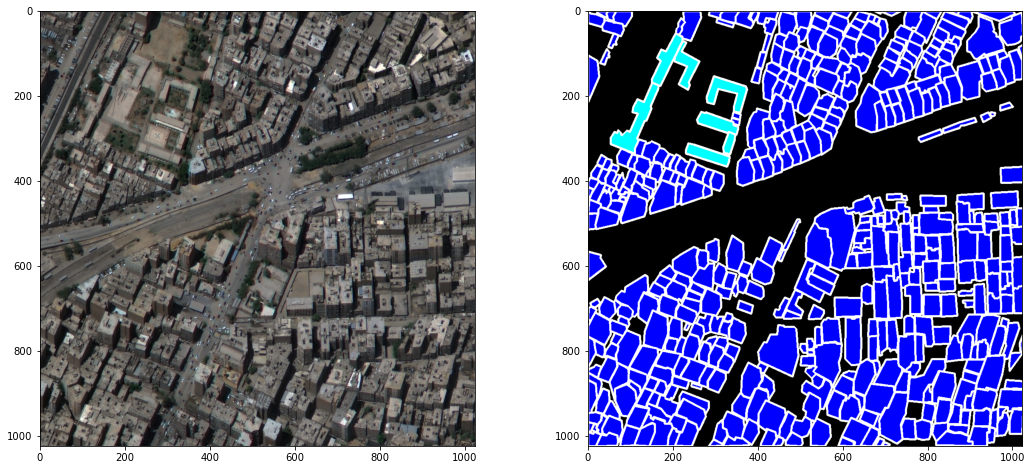

In [5]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
image = imread(image_path)
plt.imshow(image)
plt.subplot(1, 2, 2)
image_label = imread(image_label_path)
plt.imshow(image_label)

In [6]:
with open(json_path) as f:
    json_file = json.load(f)
    print(json.dumps(json_file, indent=2))

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            31.3202025313,
            30.1296944832,
            0.0
          ],
          [
            31.3260470732,
            30.1297691398,
            0.0
          ],
          [
            31.3259613257,
            30.134849521,
            0.0
          ],
          [
            31.3201164848,
            30.1347748492,
            0.0
          ]
        ],
        "type": "Polygon"
      },
      "properties": {
        "object_imcoords": "EMPTY",
        "building_imcoords": "902.6151201492264,0,968.6258732306792,23.876229837972275,1005.6106214110677,7.958743279324091,1001.3971690867196,0",
        "road_imcoords": "EMPTY",
        "image_id": "BLD00631_PS3_K3A_NIA0277.png",
        "ingest_time": "2020-11-19T01:46:58.001500Z",
        "type_id": "1",
        "type_name": "\uc18c\ud615 \uc2dc\uc124"
      },
      "type": "Feature"
    },
    {
      "geometry": {
        "coordinates": 

In [7]:
json_file.keys()

dict_keys(['features', 'type'])

In [8]:
for feature in json_file['features']:
    print(list(map(float, feature['properties']['building_imcoords'].split(','))))
    print(feature['properties']['type_id'])
    print(feature['properties']['type_name'])
    print(feature['properties']['image_id'])
    print('------------------')

[902.6151201492264, 0.0, 968.6258732306792, 23.876229837972275, 1005.6106214110677, 7.958743279324091, 1001.3971690867196, 0.0]
1
소형 시설
BLD00631_PS3_K3A_NIA0277.png
------------------
[919.4689294466184, 11.23587286492813, 919.0007680772466, 36.98474818038842, 912.4465089060384, 48.220621045316555, 892.3155700230423, 70.69236677517281, 892.3155700230423, 94.10043524377308, 900.7424746717384, 97.37756482937712, 909.6375406898064, 111.89056727990928, 916.6599612303866, 113.7632127573973, 933.0456091584068, 100.18653304560917, 934.9182546358948, 104.8681467393292, 979.3935847262352, 90.35514428879704, 977.9891006181192, 77.24662594638089, 967.2213891225632, 60.39281664898869, 961.6034526900992, 60.39281664898869, 961.6034526900992, 53.37039610840861, 953.6447094107748, 47.75245967594455, 956.9218389963788, 44.94349145971252, 950.835741194543, 23.876229837972275]
1
소형 시설
BLD00631_PS3_K3A_NIA0277.png
------------------
[1021.5281079697156, 3.745290954976043, 997.6518781317434, 12.1721956036

ValueError: could not convert string to float: 

## Polygon 그리기

In [22]:
bg = np.zeros((1024, 1024, 3), np.uint8)

In [23]:
img = cv2.polylines(bg, polygon_list, True, (255, 255, 255))

In [ ]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(img)

In [33]:
image_path = './Data/building/val/raw/'
label_path = './Data/building/val/label/'

In [34]:
image_files = glob.glob(image_path + '*.png')
json_files = glob.glob(label_path + '*.json')
label_files = glob.glob(label_path + '*.png')

In [35]:
image_files.sort()
json_files.sort()
label_files.sort()

In [36]:
label_dict = {}

In [37]:
def parse_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['building_imcoords']:
            polygon = list(map(float, feature['properties']['building_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

In [38]:
def show_label(image_path, label_path, polygon_list):
        fig = plt.figure(figsize=(18, 8))
        plt.subplot(1, 2, 1)
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        image = cv2.fillPoly(image, polygon_list, (0, 255, 0))
        image = cv2.polylines(image, polygon_list, True, (255, 255, 255), 3)
        plt.imshow(image)
        plt.subplot(1, 2, 2)
        image_label = imread(label_path)
        plt.imshow(image_label)

In [39]:
def draw_label(image_path, label_path, polygon_list):
        filename = os.path.splitext(os.path.basename(image_path))[0]
        savepath = './Data/building/val/outline_label/'
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        image = cv2.fillPoly(image, polygon_list, (0, 255, 0))
        image = cv2.polylines(image, polygon_list, True, (255, 255, 255), 3)
        img = Image.fromarray(image)
        img.save(f'{savepath}{filename}.png')
        print(f'{savepath}{filename}.png saved!')

In [40]:
def check_filename(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

In [41]:
for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    json_path = json_files[i]
    if check_filename(image_path) == check_filename(label_path) == check_filename(json_path):
        with open(json_path) as f:
            json_file = json.load(f)
            polygon_list, label_list = parse_json(json_file)
            # show_label(image_path, label_path, polygon_list)
            draw_label(image_path, label_path, polygon_list)
    else:
        print("filename Different!")

./Data/building/val/outline_label/BLD00007_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00010_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00031_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00033_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00048_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00051_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00054_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00080_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00084_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00096_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00101_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00126_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00134_PS3_K3A_NIA0276.png saved!
./Data/building/val/outline_label/BLD00145_PS3_K3A_NIA0276.png saved!
./Data/building/val/

./Data/building/val/outline_label/BLD03367_PS3_K3A_NIA0376.png saved!
./Data/building/val/outline_label/BLD03444_PS3_K3A_NIA0376.png saved!
./Data/building/val/outline_label/BLD03532_PS3_K3A_NIA0376.png saved!
./Data/building/val/outline_label/BLD03551_PS3_K3A_NIA0376.png saved!
./Data/building/val/outline_label/BLD03693_PS3_K3A_NIA0376.png saved!
./Data/building/val/outline_label/BLD03702_PS3_K3A_NIA0376.png saved!
./Data/building/val/outline_label/BLD04051_PS3_K3A_NIA0377.png saved!
./Data/building/val/outline_label/BLD04402_PS3_K3A_NIA0378.png saved!
./Data/building/val/outline_label/BLD04404_PS3_K3A_NIA0378.png saved!
./Data/building/val/outline_label/BLD04430_PS3_K3A_NIA0378.png saved!
./Data/building/val/outline_label/BLD05519_PS3_K3A_NIA0380.png saved!
./Data/building/val/outline_label/BLD05866_PS3_K3A_NIA0380.png saved!
./Data/building/val/outline_label/BLD06235_PS3_K3A_NIA0381.png saved!
./Data/building/val/outline_label/BLD06236_PS3_K3A_NIA0381.png saved!
./Data/building/val/

In [42]:
len(image_files)

159